# Case Study:
## Customer Churn Analysis for an E-Commerce Platform


### Objective: 
Analyze customer data to understand churn (customers who stop purchasing) and identify strategies to retain them.


## 1. Data Import 
The initial step involves importing the necessary libraries and loading the dataset into a Pandas DataFrame for analysis.  then display the first 5 rows to ensure the data has been successfully imported.

In [583]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Churn_df = pd.read_csv(r'C:\Users\Mohsu\Desktop\python workspace\E-commerce Customer Churn\data_ecommerce_customer_churn.csv')
Churn_df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [584]:
# the information of the data will give us clear idea about the data
print('this is the information of the data :')
Churn_df.info()

this is the information of the data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


## 2. Data Cleaning and Preprocessing

check for missing values, ensure correct data types, and perform any necessary cleaning.

In [585]:
print("\n The missing values in the Customer dataset are as follows :")
Churn_df.isnull().sum()


 The missing values in the Customer dataset are as follows :


Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [586]:
# replacing the missing values with the mean of the column
Churn_df['Tenure'].fillna(Churn_df['Tenure'].mean(), inplace = True)
Churn_df['WarehouseToHome'].fillna(Churn_df['WarehouseToHome'].mean(), inplace = True)
Churn_df['DaySinceLastOrder'].fillna(Churn_df['DaySinceLastOrder'].mean(), inplace = True)

# checking the missing values after replacing
print("\n The missing values in the Customer dataset are as follows :") 
Churn_df.isnull().sum()


 The missing values in the Customer dataset are as follows :


C:\Users\Mohsu\AppData\Local\Temp\ipykernel_14332\3971844362.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Churn_df['Tenure'].fillna(Churn_df['Tenure'].mean(), inplace = True)
C:\Users\Mohsu\AppData\Local\Temp\ipykernel_14332\3971844362.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

In [587]:
# checking the unique values in the PreferedOrderCat column
print("\n The unique values in the PreferedOrderCat column are as follows :")
Churn_df['PreferedOrderCat'].unique()


 The unique values in the PreferedOrderCat column are as follows :


array(['Laptop & Accessory', 'Mobile', 'Fashion', 'Others',
       'Mobile Phone', 'Grocery'], dtype=object)

In [588]:
# checking the unique values in the MaritalStatus column
print("\n The unique values in the MaritalStatus column are as follows :")
Churn_df['MaritalStatus'].unique()


 The unique values in the MaritalStatus column are as follows :


array(['Single', 'Married', 'Divorced'], dtype=object)

In [589]:
# checking the unique values in the Churn column
print("\n The unique values in the Churn column are as follows :")
Churn_df['Churn'].unique()


 The unique values in the Churn column are as follows :


array([0, 1])

In [590]:
# checking the unique values in the SatisfactionScore column
print("\n The unique values in the SatisfactionScore column are as follows :")
Churn_df['SatisfactionScore'].unique()


 The unique values in the SatisfactionScore column are as follows :


array([3, 1, 4, 2, 5])

In [591]:

# checking the unique values in the Complain column
print("\n The unique values in the Complain column are as follows :")
Churn_df['Complain'].unique()


 The unique values in the Complain column are as follows :


array([0, 1])

## Step 3: Exploratory Data Analysis (EDA)

In [592]:
# 1. What percentage of customers have churned?

percentage_churned = (Churn_df['Churn'].value_counts()[1] / Churn_df.shape[0]) * 100
print(f"\n The percentage of customers who have churned is as follows :  {percentage_churned:.2f}%")



 The percentage of customers who have churned is as follows :  17.10%


In [593]:
# 2. Are churned customers more likely to have specific behaviors (e.g., low purchase frequency)?


# Compare churned vs non-churned customers for behavior (numerical features)
churned_customers = Churn_df[Churn_df['Churn'] == 1]
non_churned_customers = Churn_df[Churn_df['Churn'] == 0]

# Summary statistics for churned customers
print("\n Summary statistics for churned customers :")
churned_customers.describe()



 Summary statistics for churned customers :


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.0
mean,3.817818,16.936254,3.921365,3.415430,4.464392,0.541543,3.309000,159.357285,1.0
std,5.440557,8.291183,0.999875,1.346218,2.805653,0.498641,3.405808,37.841377,0.0
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,110.090000,1.0
25%,0.000000,10.000000,3.000000,3.000000,2.000000,0.000000,1.000000,129.900000,1.0
50%,1.000000,15.650583,4.000000,3.000000,3.000000,1.000000,3.000000,149.340000,1.0
75%,7.000000,22.000000,5.000000,5.000000,6.000000,1.000000,4.531652,174.302500,1.0
max,21.000000,36.000000,6.000000,5.000000,19.000000,1.000000,46.000000,323.590000,1.0


In [594]:
# Summary statistics for non-churned customers
print("\n Summary statistics for non-churned customers :")
non_churned_customers.describe()



 Summary statistics for non-churned customers :


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.0
mean,11.373609,15.385342,3.629324,3.020814,4.191001,0.228956,4.783892,180.286847,0.0
std,8.184150,8.240807,1.009767,1.379647,2.586224,0.420225,3.547956,50.019129,0.0
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,5.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,147.250000,0.0
50%,10.000000,14.000000,4.000000,3.000000,3.000000,0.000000,4.000000,166.080000,0.0
75%,16.000000,19.000000,4.000000,4.000000,6.000000,0.000000,8.000000,199.910000,0.0
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,31.000000,324.990000,0.0


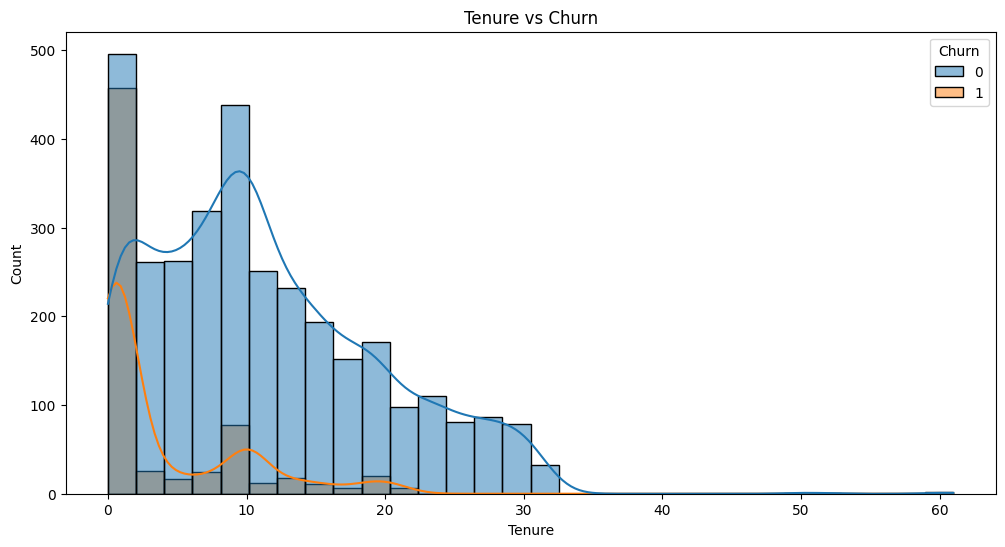

In [595]:
# Visualizing Churn vs Behavior (e.g., Tenure, SatisfactionScore, DaySinceLastOrder)

# 1. Tenure vs Churn
plt.figure(figsize=(12, 6))
sns.histplot(data=Churn_df, x='Tenure', hue='Churn', bins=30, kde=True)
plt.title('Tenure vs Churn')
plt.show()

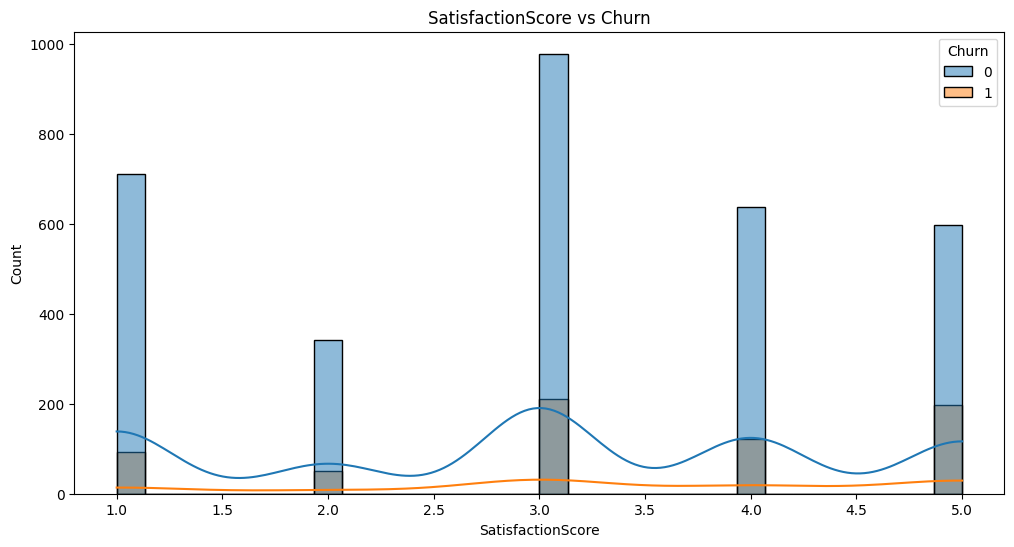

In [596]:
# SatisfactionScore vs Churn
plt.figure(figsize=(12, 6)) 
sns.histplot(data=Churn_df, x='SatisfactionScore', hue='Churn', bins=30, kde=True)
plt.title('SatisfactionScore vs Churn')
plt.show()

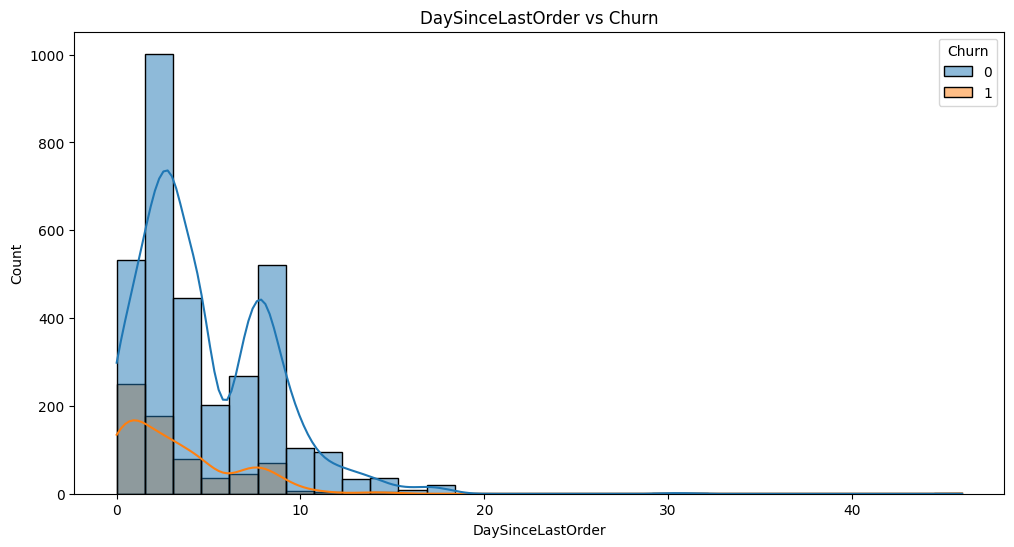

In [597]:
# DaySinceLastOrder vs Churn
plt.figure(figsize=(12, 6))
sns.histplot(data=Churn_df, x='DaySinceLastOrder', hue='Churn', bins=30, kde=True)
plt.title('DaySinceLastOrder vs Churn')
plt.show()

In [598]:
# 3. Which customer segments have the highest churn rates?

# Churn rate by 'PreferedOrderCat'
churn_rate_by_order_cat = Churn_df.groupby('PreferedOrderCat')['Churn'].mean()* 100 
churn_rate_by_order_cat = churn_rate_by_order_cat.sort_values(ascending=False)
print("\n Churn rate by PreferedOrderCat :")
churn_rate_by_order_cat.apply(lambda x: f"{x:.2f}%")



 Churn rate by PreferedOrderCat :


PreferedOrderCat
Mobile Phone          28.75%
Mobile                28.44%
Fashion               16.07%
Laptop & Accessory     9.74%
Others                 6.70%
Grocery                4.40%
Name: Churn, dtype: object

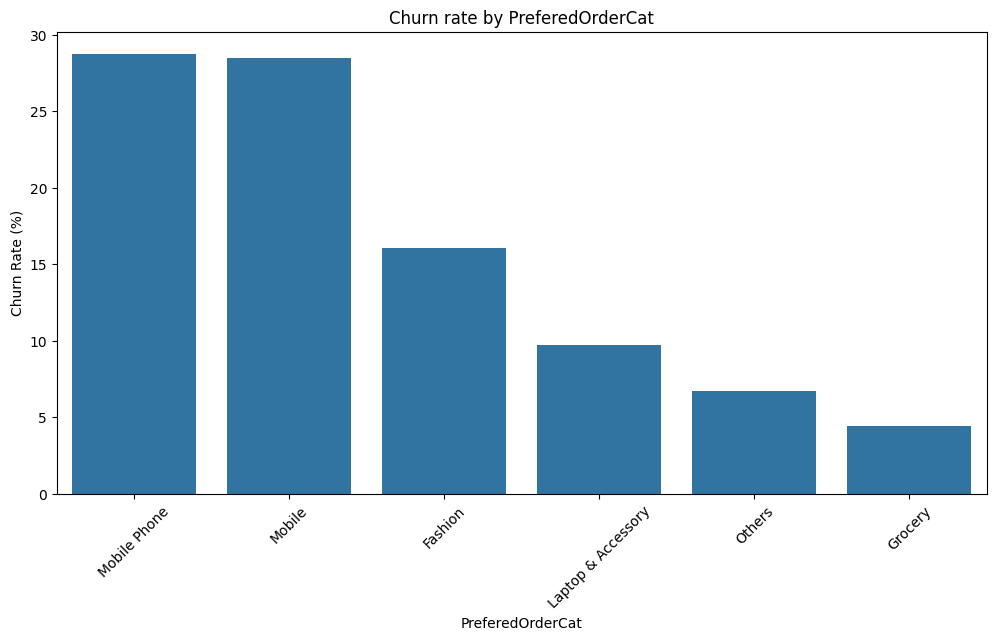

In [599]:
# visualize the churn rate by 'PreferedOrderCat'
plt.figure(figsize=(12, 6)) 
sns.barplot(x=churn_rate_by_order_cat.index, y=churn_rate_by_order_cat.values)
plt.title('Churn rate by PreferedOrderCat')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()

### **Insights:**
- **The Mobile and Mobile Phone categories** have the highest churn rates, suggesting that customers in these categories might be more likely to leave. This could indicate issues related to customer satisfaction, pricing, or product quality in these categories.
The Grocery category has the lowest churn rate, which suggests strong customer retention for grocery shoppers, possibly due to factors like necessity or convenience.
- **Fashion, Laptop & Accessory, and Others** fall in between, with moderate churn rates.

In [600]:
# churn rate by 'MaritalStatus'
churn_rate_by_marital_status = Churn_df.groupby('MaritalStatus')['Churn'].mean()* 100
churn_rate_by_marital_status = churn_rate_by_marital_status.sort_values(ascending=False)
print("\n Churn rate by MaritalStatus :")
churn_rate_by_marital_status.apply(lambda x: f"{x:.2f}%")


 Churn rate by MaritalStatus :


MaritalStatus
Single      27.10%
Divorced    15.45%
Married     11.19%
Name: Churn, dtype: object

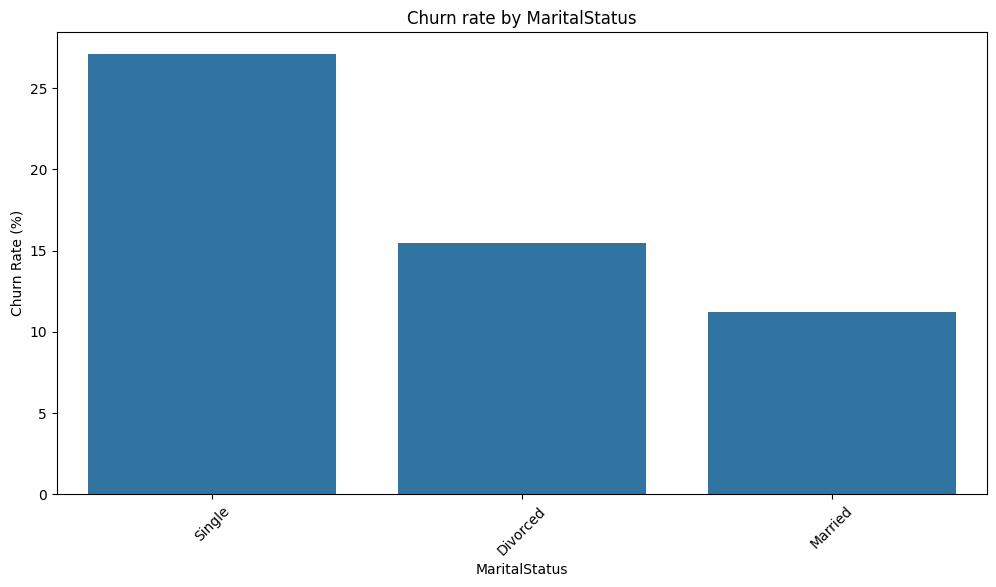

In [601]:
# visualize the churn rate by 'MaritalStatus'
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_rate_by_marital_status.index, y=churn_rate_by_marital_status.values)
plt.title('Churn rate by MaritalStatus')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()

### **Insights:**
- **Single customers :**  have the highest churn rate, which may point to factors such as different shopping behaviors, lifestyle, or financial circumstances. It might be beneficial to investigate whether promotional offers, loyalty programs, or personalized services could help reduce churn in this group.
- **Divorced customers :** have a moderate churn rate, so they could be a segment to monitor closely and try to understand their specific needs and preferences.
- **Married customers :**, with the lowest churn rate, are typically more stable and loyal, possibly due to more consistent purchasing habits or financial stability. Retention efforts for this group might not need to be as aggressive but could focus on further strengthening their loyalty.

In [602]:
# Churn vs Complain (whether the customer has complained)
churn_rate_by_complain = Churn_df.groupby('Complain')['Churn'].mean()* 100
churn_rate_by_complain = churn_rate_by_complain.sort_values(ascending=False)
print("\n Churn rate by Complain :")
churn_rate_by_complain.apply(lambda x: f"{x:.2f}%")



 Churn rate by Complain :


Complain
1    32.79%
0    10.93%
Name: Churn, dtype: object

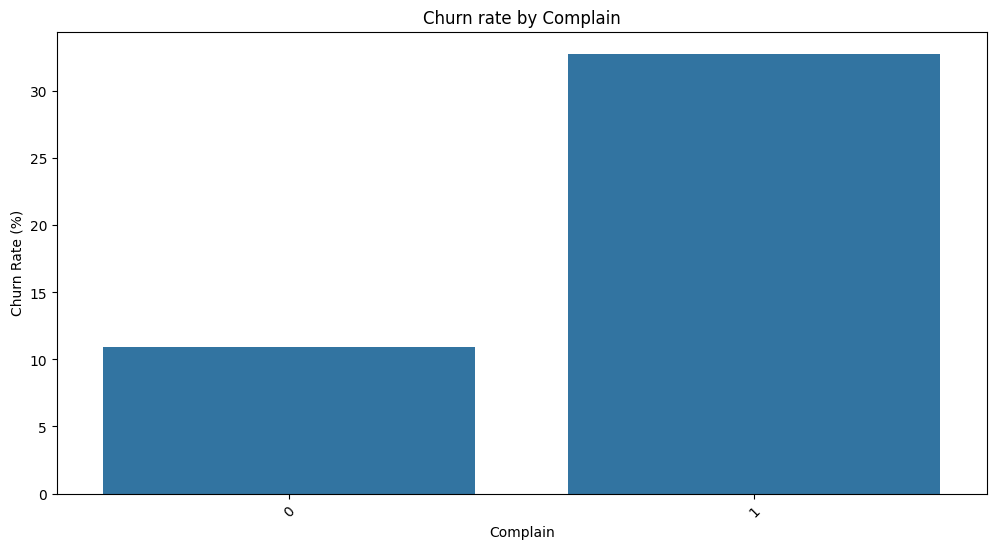

In [603]:
# visualize the churn rate by 'Complain'
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_rate_by_complain.index, y=churn_rate_by_complain.values)
plt.title('Churn rate by Complain')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()

### **Insights:**
- **Complaining customers** have a much higher churn rate, suggesting that dissatisfaction plays a significant role in customer retention. Addressing complaints quickly and effectively could be key to improving retention rates for this group.
- **Non-complaining customers** have a much lower churn rate, which suggests that satisfied customers are less likely to leave, making it important to maintain high customer satisfaction levels.

## Key Factors Contributing to Churn :
- 1. Investigate customer complaints or reviews to identify pain points. Consider offering discounts, better warranty services, or loyalty programs to retain these customers.
- 2. Tailor marketing strategies to address the needs of single customers. Consider offering flexible subscription models, targeted offers, or more personalized shopping experiences (e.g., product recommendations based on personal interests).
- 3.  Improve customer service by ensuring timely and effective resolution of complaints. Implement a follow-up system where customers who lodge complaints are contacted to ensure satisfaction and minimize the chances of churn.


## Suggested Campaigns to Target At-Risk Customers:
- 1. Re-engagement Emails for Single & Complaining Customers :  Create a targeted re-engagement email campaign to reach out to single customers and those who have lodged complaints.
- 2. Loyalty Programs for Married and Non-Complaining Customers :  Offer points, discounts, or exclusive access to future products or events as incentives to retain them. .
- 3. Customer Satisfaction Surveys : Implement regular satisfaction surveys, especially targeting customers who have churned or are showing signs of dissatisfaction . 